<a href="https://colab.research.google.com/github/Dipika591/Basic_Python/blob/main/Final_Extracted_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install python-docx pymupdf
!sudo apt install libreoffice  # For Ubuntu/Debian

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libreoffice is already the newest version (1:7.3.7-0ubuntu0.22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [9]:
import os
import zipfile
import subprocess
import pandas as pd
from docx import Document
import fitz  # PyMuPDF

# Paths
zip_file_path = "/content/Dataset.zip"  # Update if needed
extract_dir = "extracted_dataset"
converted_docs_dir = os.path.join(extract_dir, "converted_docs")

# Step 1: Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Convert .doc to .docx using LibreOffice (headless)
os.makedirs(converted_docs_dir, exist_ok=True)

for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.lower().endswith(".doc") and not file.lower().endswith(".docx"):
            full_path = os.path.join(root, file)
            try:
                subprocess.run([
                    "libreoffice", "--headless", "--convert-to", "docx",
                    "--outdir", converted_docs_dir, full_path
                ], check=True)
                print(f"Converted: {file}")
            except subprocess.CalledProcessError as e:
                print(f"Error converting {file}: {e}")

# Step 3: Text extraction functions
def extract_docx_text(path):
    try:
        doc = Document(path)
        return "\n".join([p.text for p in doc.paragraphs])
    except Exception as e:
        return f"[ERROR .docx]: {e}"

def extract_pdf_text(path):
    try:
        pdf = fitz.open(path)
        return "\n".join([page.get_text() for page in pdf])
    except Exception as e:
        return f"[ERROR .pdf]: {e}"

# Step 4: Collect all .docx (including converted ones) and .pdf files
all_files = []

for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.lower().endswith((".docx", ".pdf")):
            all_files.append(os.path.join(root, file))

for file in os.listdir(converted_docs_dir):
    if file.lower().endswith(".docx"):
        all_files.append(os.path.join(converted_docs_dir, file))

# Step 5: Extract text and write to CSV
records = []

for file_path in all_files:
    filename = os.path.basename(file_path)
    if file_path.endswith(".docx"):
        text = extract_docx_text(file_path)
    elif file_path.endswith(".pdf"):
        text = extract_pdf_text(file_path)
    else:
        continue

    records.append({"filename": filename, "text": text})

# Step 6: Save to CSV
df = pd.DataFrame(records)
csv_output_path = "extracted_text_output.csv"
df.to_csv(csv_output_path, index=False)
print(f"CSV created: {csv_output_path}")


Converted: React JS Developer_AnjaniPriyadarshini.doc
Converted: React Developer_PavasGoswami.doc
Converted: React Developer_Vinay Reddy.doc
Converted: Tatikonda Kiran Kumar.doc
Converted: Priyanka L.doc
Converted: Nazeer Basha.doc
Converted: PeopleSoft DBA_Ganesh Alladi.doc
Converted: Peoplesoft Admin_Priyanka Ramadoss.doc
Converted: Peoplesoft Finance_Rahul Ahuja.doc
Converted: Peoplesoft Admin_Gangareddy.doc
Converted: Peoplesoft Admin_Vinod Akkala.doc
Converted: Peoplesoft Finance_Arun Venu.doc
Converted: Peoplesoft Finance_Pritam Biswas.doc
Converted: Peoplesoft FSCM_R Ahmed.doc
Converted: Peoplesoft Admin_G Ananda Rayudu.doc
Converted: Peoplesoft Admin_srinivasarao.doc
Converted: J. Sumanth Royal_Hexaware.doc
Converted: Harikrishna Akula_Hexaware.doc
Converted: Naresh Babu Cherukuri_Hexaware.doc
Converted: Venkateswarlu B_Hexaware.doc
Converted: Madeeswar A_Hexaware.doc
Converted: Punugoti Swetha_Hexaware.doc
Converted: Sri Krishna S_Hexaware.doc
Converted: ShireeshKumar_Hexaware

In [11]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("/content/extracted_text_output.csv")

# Show how many duplicates are found
print("Total duplicates:", df.duplicated().sum())

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save cleaned data to a new CSV file
df_cleaned.to_csv("cleaned_output.csv", index=False)

print("Duplicates removed. Cleaned file saved as 'cleaned_output.csv'.")


Total duplicates: 26
Duplicates removed. Cleaned file saved as 'cleaned_output.csv'.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK stopwords (only first time)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Load the data
df = pd.read_csv('cleaned_output.csv')  # Adjust the filename if needed

# Basic info
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  79 non-null     object
 1   text      79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
None
                                            filename  \
0  React Dev_Krishna Kanth_Musquare Technologies....   
1                  React Developer_Naveen sadhu.docx   
2               React Developer_Kamalakar Reddy.docx   
3                   React Developer_Deepakreddy.docx   
4  Reactjs Developer_M Lokesh Babu_Musquare Techn...   

                                                text  
0  \nUi-Developer/ React JS Developer \nNAME: KRI...  
1  \nNaveen Sadhu\n\n\nTitle: software developer\...  
2  KAMALAKAR REDDY. A \nLinked In: https://www.li...  
3  Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  
4  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  
filename    0
text        0
dtype:

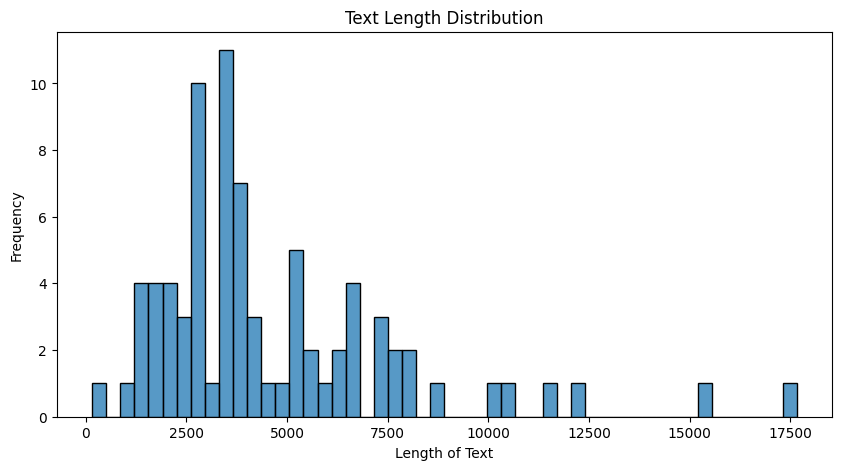

In [14]:
df['text_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

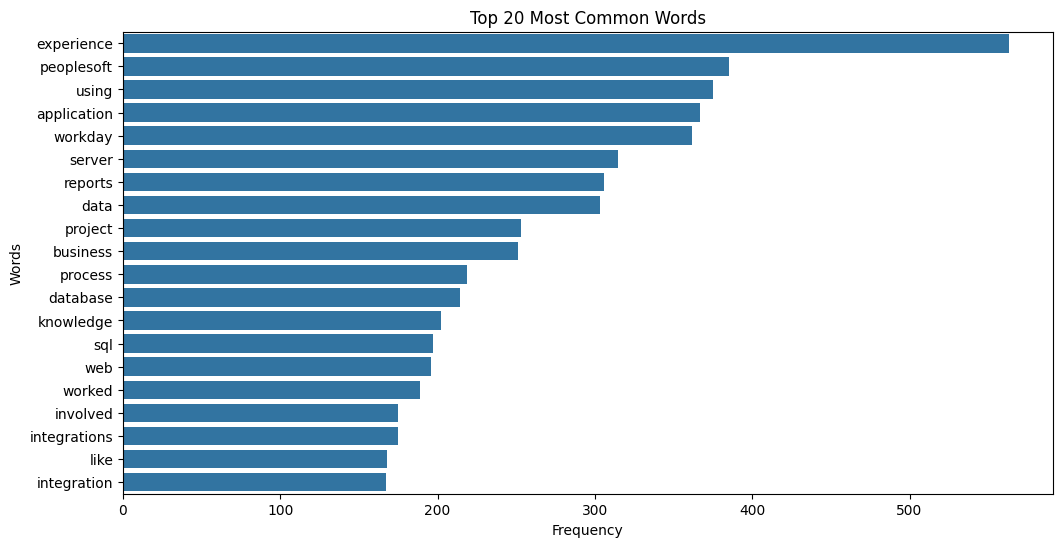

In [15]:
# Combine all text
all_text = ' '.join(df['text'].dropna().astype(str)).lower()

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
all_text = ''.join([ch for ch in all_text if ch not in string.punctuation])
filtered_words = [word for word in all_text.split() if word not in stop_words]

# Word frequency
word_freq = pd.Series(filtered_words).value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=word_freq.values, y=word_freq.index)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

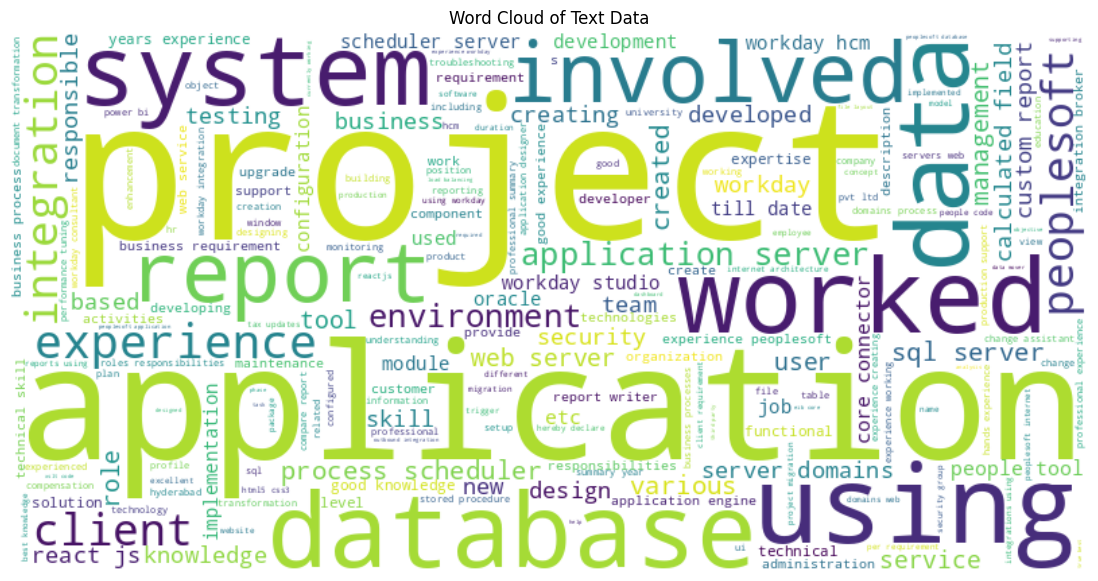

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

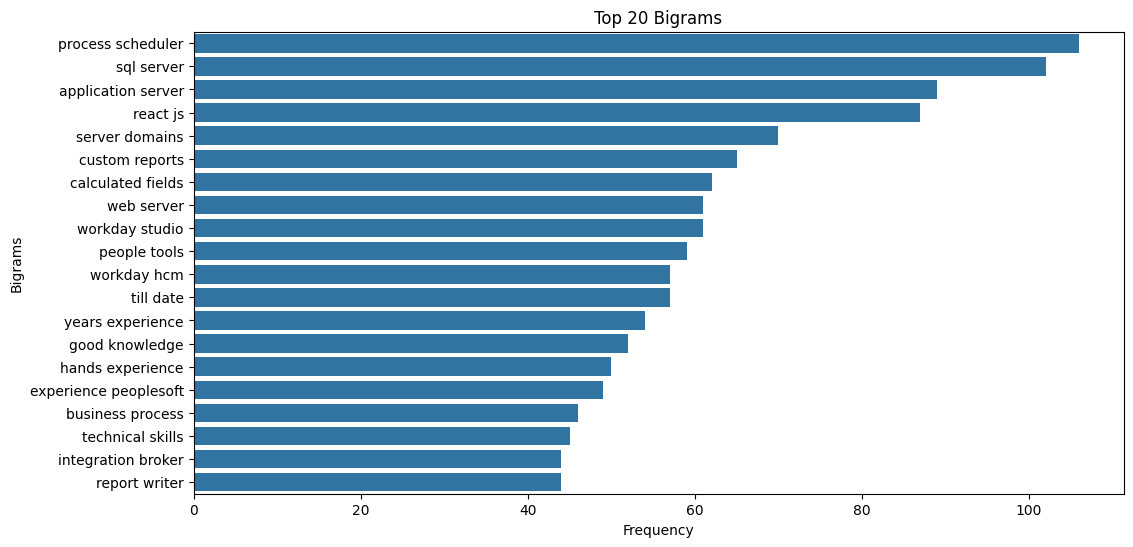

In [17]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['text'].astype(str))
bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_bigrams = bigrams.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()